## Plotting Labels on top of images
We pick a folder of labeled data, read the labels csv, load the images, and scatter the points on them with different colors for different labels.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# load the fish data
data_path = "/Users/danbiderman/Dropbox/Columbia/1.Dan/Research/litpose-datastores-dec-22/mirror-fish"
# assert a folder
assert os.path.isdir(data_path), "data_path does not exist"
# print all the files ending with `.csv` in the folder
print(os.listdir(data_path))


['videos_test', 'CollectedData.csv', '.DS_Store', 'CollectedData_new.csv', 'videos_new', 'videos', 'labeled-data']


In [13]:
in_dist = pd.read_csv(os.path.join(data_path, "CollectedData.csv"), index_col=0, header = [0,1,2])
out_of_dist = pd.read_csv(os.path.join(data_path, "CollectedData_new.csv"), index_col=0, header = [0,1,2])
# concat the two dataframes
df = pd.concat([in_dist, out_of_dist], axis=0)
assert(df.shape[0] == in_dist.shape[0] + out_of_dist.shape[0])
assert(df.shape[1] == in_dist.shape[1])

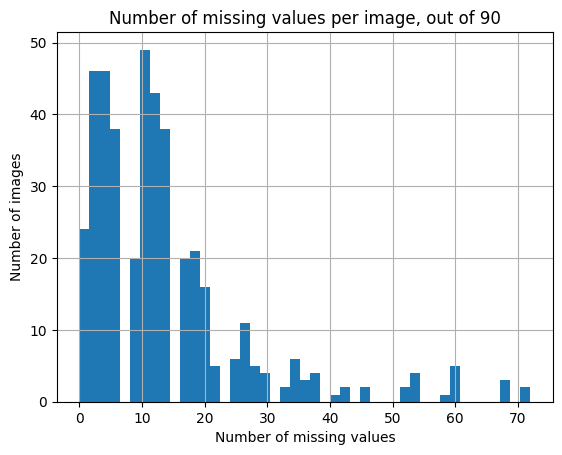

In [53]:
df.isna().sum(1).hist(bins=45)
plt.title("Number of missing values per image, out of %i" % df.shape[1])
plt.xlabel("Number of missing values")
plt.ylabel("Number of images")
# set the x labels to be num missing values / num total values
plt.show()

In [46]:
def plot_image_with_labels(image, labels, title=None):
    """Plot an image and its labels. add one color per label, and a legend"""
    plt.imshow(image, cmap="gray")
    plt.scatter(labels[:, 0], labels[:, 1], facecolors='none', edgecolors='r', s=6, marker="o")
    if title is not None:
        plt.title(title)

In [47]:
new_image_dir = "/Users/danbiderman/Dropbox/Columbia/1.Dan/Research/fish-debugging"
# make sure the folder exists, if not create
if not os.path.isdir(new_image_dir):
    os.makedirs(new_image_dir, exist_ok=True)
for row in range(df.shape[0]):
    image_file = df.iloc[row].name
    image = plt.imread(os.path.join(data_path, image_file))
    labels = df.iloc[row].values.reshape(-1, 2)
    plot_image_with_labels(image, labels, title=image_file)
    saving_path = os.path.join(new_image_dir, image_file)
    # assert the subfolder exists, if not create
    if not os.path.isdir(os.path.dirname(saving_path)):
        os.makedirs(os.path.dirname(saving_path), exist_ok=True)
    plt.savefig(saving_path)
    plt.close()

In [65]:
# get bodypart names in the order they appear in the dataframe
mat = df.to_numpy()

In [67]:
keypoint_names = [b[1] for b in df.columns if b[2] == 'x']

In [69]:
for i, kp_name in enumerate(keypoint_names):
    print(i, kp_name)

0 head_main
1 chin_base_main
2 chin1_4_main
3 chin_half_main
4 chin3_4_main
5 chin_tip_main
6 mid_main
7 fork_main
8 stripeA_main
9 stripeP_main
10 tail_neck_main
11 dorsal_main
12 anal_main
13 caudal_d_main
14 caudal_v_main
15 head_top
16 chin_base_top
17 chin1_4_top
18 chin_half_top
19 chin3_4_top
20 chin_tip_top
21 mid_top
22 fork_top
23 stripeA_top
24 stripeP_top
25 tail_neck_top
26 dorsal_top
27 anal_top
28 caudal_d_top
29 caudal_v_top
30 head_right
31 chin_base_right
32 chin1_4_right
33 chin_half_right
34 chin3_4_right
35 chin_tip_right
36 mid_right
37 fork_right
38 stripeA_right
39 stripeP_right
40 tail_neck_right
41 dorsal_right
42 anal_right
43 caudal_d_right
44 caudal_v_right


In [59]:
# print all column names along with their indices 
for i, col in enumerate(df.columns.levels[1]):
    print(i, col)

0 anal_main
1 anal_right
2 anal_top
3 caudal_d_main
4 caudal_d_right
5 caudal_d_top
6 caudal_v_main
7 caudal_v_right
8 caudal_v_top
9 chin1_4_main
10 chin1_4_right
11 chin1_4_top
12 chin3_4_main
13 chin3_4_right
14 chin3_4_top
15 chin_base_main
16 chin_base_right
17 chin_base_top
18 chin_half_main
19 chin_half_right
20 chin_half_top
21 chin_tip_main
22 chin_tip_right
23 chin_tip_top
24 dorsal_main
25 dorsal_right
26 dorsal_top
27 fork_main
28 fork_right
29 fork_top
30 head_main
31 head_right
32 head_top
33 mid_main
34 mid_right
35 mid_top
36 stripeA_main
37 stripeA_right
38 stripeA_top
39 stripeP_main
40 stripeP_right
41 stripeP_top
42 tail_neck_main
43 tail_neck_right
44 tail_neck_top


In [40]:
df.index[0]

'labeled-data/20201001_Hank/img008902.png'

In [ ]:
df